**IMPLEMENTATION OF BB84 PROTOCOL ON IBM QX**

In [1]:
"import all what we need for this projet"
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute,Aer,IBMQ,assemble
from numpy import pi
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.compiler import transpile

***A quad-base implementation of the BB84 protocol.***

In [2]:
"We suppose that alice send to bob this key named Ka "
Ka="01101"

In [3]:
"Creation of the first circuit ( the communication between alice and bob without eve)"
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

for m in range(len(Ka)):
    if str(Ka)[m]=="1":
        circuit.x(qreg_q[m])
circuit.barrier(qreg_q[3], qreg_q[2], qreg_q[4], qreg_q[1], qreg_q[0])

circuit.h(qreg_q[0])
circuit.t(qreg_q[0])

circuit.h(qreg_q[1])
circuit.s(qreg_q[1])

circuit.h(qreg_q[2])
circuit.s(qreg_q[2])

circuit.h(qreg_q[3])
circuit.t(qreg_q[3])

circuit.h(qreg_q[4])
circuit.z(qreg_q[4])

circuit.barrier(qreg_q[3], qreg_q[2], qreg_q[4], qreg_q[1], qreg_q[0])
circuit.barrier(qreg_q[3], qreg_q[2], qreg_q[4], qreg_q[1], qreg_q[0])
circuit.sdg(qreg_q[1])
circuit.tdg(qreg_q[0])
circuit.h(qreg_q[2])
circuit.z(qreg_q[4])
circuit.z(qreg_q[3])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[4])
circuit.h(qreg_q[3])
circuit.barrier(qreg_q[3], qreg_q[2], qreg_q[4], qreg_q[1], qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.measure(qreg_q[4], creg_c[4])

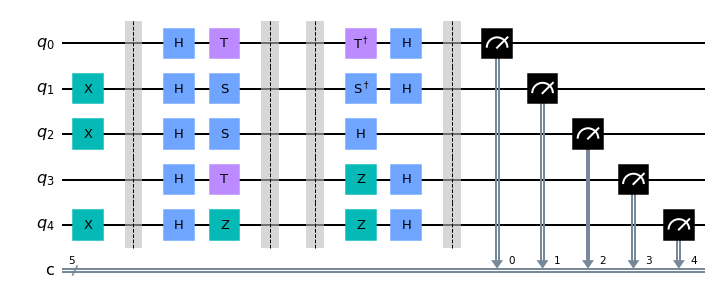

In [4]:
"drawing the circuit to see each part of the implementation "
circuit.draw(output='mpl')

***0)The left part of the first barrier represents the superpositon of the Qubits (initial bit sequence)<br>1)the part between the first and second barriers represent Alice's encoding. <br>2)the part between the second and third barriers  represent Bob's decoding.<br>3)the second The distance from the third barrier can be viewed like a quantum channel.<br>4)The right part of the fourth obstacle contains Bob's measurements.<br>***

| Qubit Index| ExpectedResult |
| --- | --- | 
| q[0] | 1 (100%) |
| q[1] | 0 (100%) |
| q[2] | 0 (50%) & 1 (50%) |
| q[3] | 1 (50%) |
| q[4] | 0 (50%) & 1 (50%) |

In [6]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circuit, shots=8192)
job = aer_sim.run(qobj)                             
hist = job.result().get_counts()
print(hist)


{'11110': 3504, '11010': 3470, '10010': 629, '10110': 589}


C:\ProgramData\Anaconda3\lib\site-packages\qiskit\utils\deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


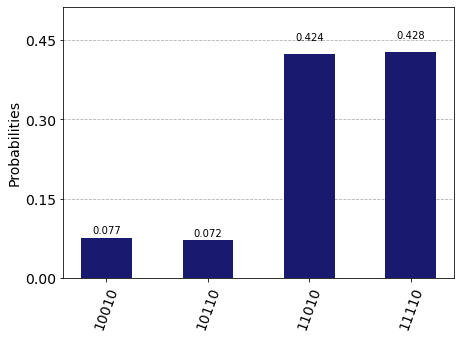

In [8]:
plot_histogram(hist, color='midnightblue')

**In all of the outputs, the value of q[0] is 1 which implies that the probability of acquiring 1 is 100% which is what we expected. Similarly, the probability of measuring other qubits can be calculated like this and will be similar tothe result in table**

Job Status: job has successfully run


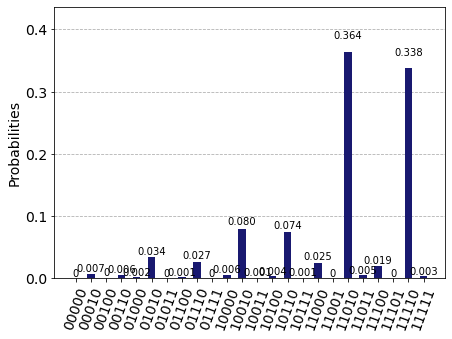

In [9]:
provider = IBMQ.load_account()
backend_ibmq = provider.get_backend('ibmq_manila')
tp = transpile(circuit, backend_ibmq)
job_ibmq = execute(circuit, backend_ibmq, shots=8192, optimization_level=3)
job_monitor(job_ibmq)
result_ibmq = job_ibmq.result()
counts = result_ibmq.get_counts(circuit)
plot_histogram(counts,color='midnightblue')

----------------------------------------------------------------------------------------------------------------------

**DIFFERENT ATTACKS ON THE QUANTUMCIRCUIT**<br>
__Third party interpretation__

In [10]:
"give the number of Qbits that eve will be intersept e.g: 034 that means eve will be intersept the qubit number 0,3 and 4"
Ke="134"
p=[]
for m in range(len(Ke)):
    p+=[Ke[m]]
p.sort()
Ke=p

In [11]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(5, 'c')
qca = QuantumCircuit(qreg_q, creg_c)
qce = QuantumCircuit(qreg_q, creg_c)
qcb = QuantumCircuit(qreg_q, creg_c)

for m in range(len(str(Ka))):
    if str(Ka)[m]=="1":
        qca.x(qreg_q[m])
qca.barrier(qreg_q[3], qreg_q[2], qreg_q[4], qreg_q[1], qreg_q[0])
qca.h(qreg_q[0])
qca.h(qreg_q[1])
qca.h(qreg_q[2])
qca.h(qreg_q[3])
qca.h(qreg_q[4])
qca.s(qreg_q[1])
qca.t(qreg_q[0])
qca.s(qreg_q[2])
qca.z(qreg_q[4])
qca.t(qreg_q[3])
"-------------------------------------------------------------------------"
"in this part (the third part can ) the eve can be the MITM of the quantum channel"
qce.barrier(qreg_q[3], qreg_q[2], qreg_q[4], qreg_q[1], qreg_q[0])
for m in range(0,len(Ke),2):
    qce.tdg(qreg_q[int(Ke[m])])
    if (m+1)!=len(Ke):
        qce.z(qreg_q[int(Ke[m+1])])
for m in range(len(Ke)):
    qce.h(qreg_q[int(Ke[m])])
for m in range(len(Ke)):
    qce.measure(qreg_q[int(Ke[m])], creg_c[int(Ke[m])])
for m in range(len(Ke)):
    qce.h(qreg_q[int(Ke[m])])
for m in range(0,len(Ke),2):
    qce.t(qreg_q[int(Ke[m])])
    if (m+1)!=len(Ke):
        qce.z(qreg_q[int(Ke[m+1])])
qce.barrier(qreg_q[3], qreg_q[2], qreg_q[4], qreg_q[1], qreg_q[0])
"-------------------------------------------------------------------------"
qcb.sdg(qreg_q[1])
qcb.tdg(qreg_q[0])
qcb.h(qreg_q[2])
qcb.z(qreg_q[4])
qcb.z(qreg_q[3])
qcb.h(qreg_q[1])
qcb.h(qreg_q[0])
qcb.h(qreg_q[4])
qcb.h(qreg_q[3])
qcb.barrier(qreg_q[3], qreg_q[2], qreg_q[4], qreg_q[1], qreg_q[0])
qcb.measure(qreg_q[0], creg_c[0])
qcb.measure(qreg_q[1], creg_c[1])
qcb.measure(qreg_q[2], creg_c[2])
qcb.measure(qreg_q[3], creg_c[3])
qcb.measure(qreg_q[4], creg_c[4])

<ipython-input-12-ff7b5266d283>:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc=qca+qce+qcb
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\circuit\quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


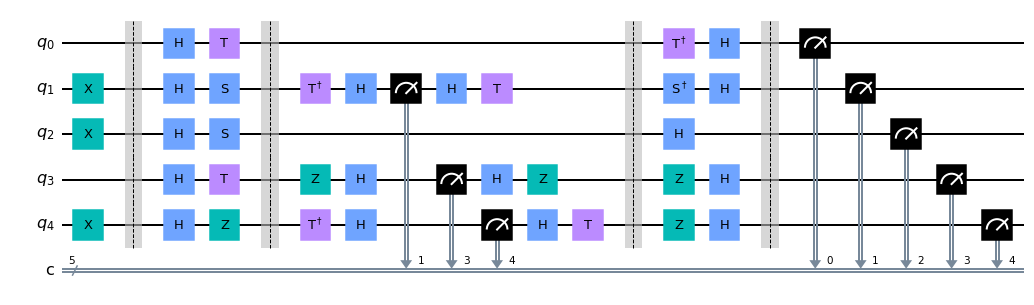

In [12]:
qc=qca+qce+qcb
qc.draw(output='mpl')

Eve decodes in some assumed basis, measures, andthen again encodes the qubits while Alice’s encoded informa-tion is being sent to Bob through the channel.<br>The qubits can not be copied as per the No-Cloning theorem.<br>Let’s sayEve attacks on q[0], q[3], q[4].

In [13]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, shots=8192)
job = aer_sim.run(qobj)
hist = job.result().get_counts()
print(hist)

{'11010': 1931, '01000': 233, '01110': 665, '01100': 223, '11100': 680, '11110': 1963, '01010': 685, '00110': 93, '11000': 625, '10010': 332, '10110': 328, '00000': 48, '10000': 105, '10100': 126, '00100': 44, '00010': 111}


C:\ProgramData\Anaconda3\lib\site-packages\qiskit\utils\deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


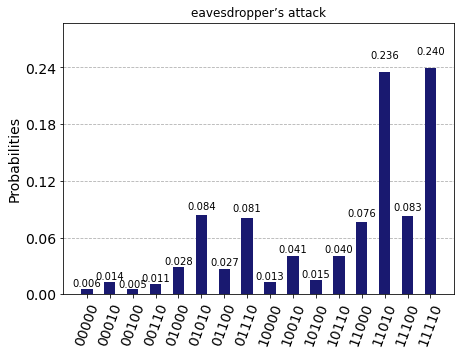

In [14]:
plot_histogram(hist, color='midnightblue')

ibmqfactory.load_account:WARNING:2022-04-20 14:31:33,427: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


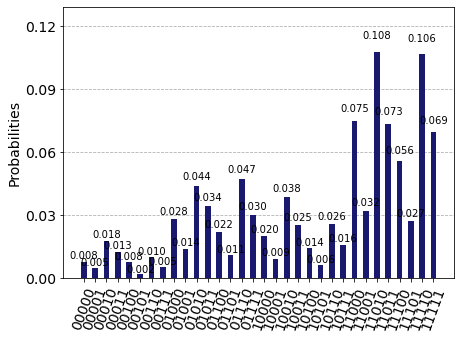

In [16]:
provider = IBMQ.load_account()
backend_ibmq = provider.get_backend('ibmq_manila')
tp = transpile(qc, backend_ibmq)
job_ibmq = execute(qc, backend_ibmq, shots=8192, optimization_level=3)
job_monitor(job_ibmq)
result_ibmq = job_ibmq.result()
counts = result_ibmq.get_counts(qc)
plot_histogram(counts,color='midnightblue')

**Note: We can find the fidality values for individual qubits of BB84 protocol circuit calculated based on the result acquired and the error mitigation <br>this two parts are on progress**